In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import mean_squared_error, r2_score

from utils import get_regression_metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet

In [84]:
# # Mostrar todas las filas
pd.set_option("display.max_rows", 10)

# # Mostrar todas las columnas
pd.set_option("display.max_columns", None)


## Paso 1: Planteamiento del problema

## Observaciones.

descubriremos si existe alguna relación entre los recursos sanitarios y los datos socio demográficos. Tomaremos como target la variable `Obesity_prevalence`

## Paso 2: Exploración y limpieza de datos

In [85]:
archivo = "../data/raw/demographic_health_data.csv"
df = pd.read_csv(archivo)
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

## Paso 3: Análisis Descriptivo

In [86]:
df.shape

(3140, 108)

## Paso 4: Limpieza de Datos

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


### Limpieza de datos: Eliminar duplicados

In [88]:
df.duplicated().sum()

np.int64(0)

### Limpieza de datos: Eliminar información irrelevante

In [89]:
df.drop(["fips", "0-9", "19-Oct", "20-29", "30-39", "40-49",
        "50-59", "60-69", "70-79", "80+", "White-alone pop",
        "Black-alone pop", "Native American/American Indian-alone pop",
        "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop",
        "Two or more races pop", "POP_ESTIMATE_2018", "N_POP_CHG_2018",
        "GQ_ESTIMATES_2018", "R_DOMESTIC_MIG_2018", "R_NET_MIG_2018",
        "Less than a high school diploma 2014-18", "High school diploma only 2014-18",
        "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
        "POVALL_2018", "PCTPOV017_2018", "PCTPOV517_2018", "CI90LBINC_2018", "CI90UBINC_2018",
        "Employed_2018", "Unemployed_2018", "Median_Household_Income_2018", "STATE_NAME",
        "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)",
        "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", 
        "Internal Medicine Primary Care (2019)", "COUNTY_NAME",
        "Family Medicine/General Practice Primary Care (2019)",
        "Total Population", "Population Aged 60+", "Percent of Population Aged 60+",
        "STATE_FIPS", "CNTY_FIPS", "county_pop2018_18 and older", "anycondition_Lower 95% CI",
        "anycondition_Upper 95% CI", "anycondition_number", "Obesity_Lower 95% CI",
        "Obesity_Upper 95% CI", "Obesity_number", "Heart disease_Lower 95% CI",
        "Heart disease_Upper 95% CI", "Heart disease_number", "COPD_Lower 95% CI",
        "COPD_Upper 95% CI", "COPD_number", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI",
        "diabetes_number", "CKD_Lower 95% CI", "CKD_Upper 95% CI", "CKD_number"], 
        axis=1, inplace=True)
df

,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,MEDHHINC_2018,Civilian_labor_force_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Urban_rural_code
0,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,11.8,9.6,2.2,0.0,11.3,32.6,28.4,27.7,13.8,59338,25957,3.6,119.0,217.1,196.7,77.2,7.6,28.859137,6.085786,1.148905,72.142154,6,47.6,35.8,7.9,8.6,12.9,3.1,3
1,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,10.5,10.3,0.1,0.5,9.7,27.6,31.3,31.3,9.8,57588,93849,3.6,115.5,217.1,196.7,77.2,7.6,113.162114,23.863512,4.505074,282.882982,51,40.2,29.7,7.8,8.6,12.0,3.2,4
2,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,10.4,12.9,-2.5,0.5,27.0,35.7,25.1,12.2,30.9,34382,8373,5.2,68.9,217.1,196.7,77.2,7.6,12.914231,2.723340,0.514126,32.283033,5,57.5,40.7,11.0,12.1,19.7,4.5,6
3,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,11.1,11.4,-0.3,0.4,16.8,47.3,24.4,11.5,21.8,46064,8661,4.0,92.3,217.1,196.7,77.2,7.6,11.626493,2.451783,0.462860,29.063942,0,51.6,38.7,8.6,10.0,14.1,3.3,2
4,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,11.8,11.4,0.3,0.1,19.8,34.0,33.5,12.6,13.2,50412,25006,3.5,101.1,217.1,196.7,77.2,7.6,30.021267,6.330854,1.195171,75.047251,6,46.3,34.0,9.2,10.5,13.5,3.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,14.178532,14.694200,12.448027,15.277229,12.389956,12.220390,11.481731,5.105572,2.204362,93.835219,1.375113,1.544680,1.010429,0.157952,2.076607,12.6,7.0,5.6,1.4,9.0,33.3,35.7,22.0,8.4,73315,21150,4.2,117.8,207.9,199.6,79.8,10.6,21.311749,11.997173,2.160982,40.537033,10,40.3,33.6,5.9,6.6,8.9,2.6,5
3136,23081,10.328842,9.466661,12.854729,17.733200,14.830380,12.685759,12.456133,6.797799,2.846497,95.190850,0.758199,0.914172,1.412417,0.151640,1.572722,9.9,3.2,6.7,1.6,5.6,13.2,23.8,57.4,6.3,99087,15340,3.0,159.2,207.9,199.6,79.8,10.6,11.425901,6.432063,1.158570,21.733183,6,24.3,19.4,5.2,4.9,7.2,2.4,5
3137,20299,15.375142,15.788955,10.606434,13.311001,11.773979,11.990738,12.581901,6.074191,2.497660,95.354451,0.827627,1.418789,0.472930,0.147791,1.778413,13.5,7.2,6.3,0.0,7.2,40.1,37.2,15.4,10.0,63401,8931,4.4,101.8,207.9,199.6,79.8,10.6,10.048714,5.656794,1.018926,19.113638,6,42.2,34.2,7.2,8.0,10.4,3.0,5
3138,7885,10.881420,14.115409,9.067850,11.452124,11.414077,13.760304,14.

## Paso 5: Análisis de Variables

### Análisis de Variables Univariante Categóricas


>Verificamos la unica variable categorica que tenemos

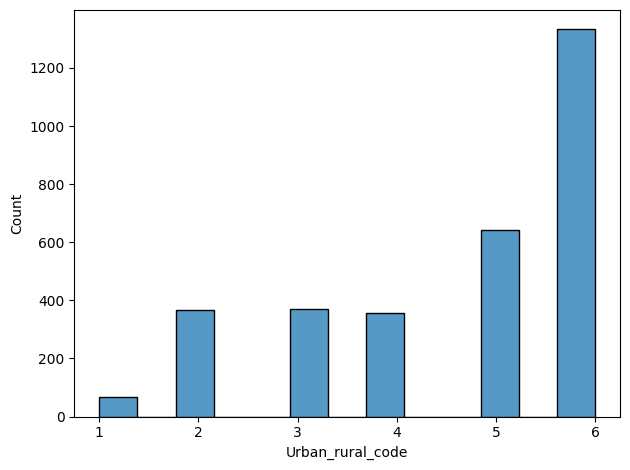

In [90]:
sns.histplot( data=df, x="Urban_rural_code")
plt.tight_layout()
plt.show()

sabemos de una variable categorica que ya esta enumerada `Urban_rural_code` y la utilizaremos.

### Análisis numérico-numérico

Usaremos y revisaremos las correlaciones.

> Al ser un numero increible de variables para graficar buscaremos la que tengan una correlacion entre ellas del 80% y las borraremos. (dejando siempre la que mas correlaciones con ella tenga), luego correlacionaremos con el target y veremos que correlaciones no son relevantes para nuestro modelo.

In [91]:
pd.set_option("display.max_rows", None)

In [92]:
corr = df.corr(numeric_only=True)

umbral = 0.8
corr_pairs = []

for i, col1 in enumerate(corr.columns):
    for col2 in corr.columns[i+1:]:  
        valor = corr.loc[col1, col2]
        if valor > umbral:
            corr_pairs.append((col1, col2, valor))

corr_pairs


[('TOT_POP', 'Civilian_labor_force_2018', np.float64(0.998041912256138)),
 ('TOT_POP',
  'Total nurse practitioners (2019)',
  np.float64(0.9638177808583888)),
 ('TOT_POP',
  'Total physician assistants (2019)',
  np.float64(0.9418263237210897)),
 ('TOT_POP', 'Total Hospitals (2019)', np.float64(0.9250326876351878)),
 ('TOT_POP',
  'Total Specialist Physicians (2019)',
  np.float64(0.9636099331025187)),
 ('TOT_POP', 'ICU Beds_x', np.float64(0.9108244182391105)),
 ('0-9 y/o % of total pop', 'R_birth_2018', np.float64(0.8844275801653143)),
 ('60-69 y/o % of total pop',
  '70-79 y/o % of total pop',
  np.float64(0.8599535831094334)),
 ('MEDHHINC_2018',
  'Med_HH_Income_Percent_of_State_Total_2018',
  np.float64(0.8334111761068165)),
 ('Civilian_labor_force_2018',
  'Total nurse practitioners (2019)',
  np.float64(0.9650980948756791)),
 ('Civilian_labor_force_2018',
  'Total physician assistants (2019)',
  np.float64(0.9421659345021494)),
 ('Civilian_labor_force_2018',
  'Total Hospitals (

In [93]:
pd.set_option("display.max_rows", 50)

In [94]:
df.drop(["Civilian_labor_force_2018", "Total nurse practitioners (2019)",
         "Total physician assistants (2019)", "Total Hospitals (2019)",
         "Total Specialist Physicians (2019)", "ICU Beds_x",
         "R_birth_2018", "Med_HH_Income_Percent_of_State_Total_2018",
         "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)",
         "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
         "anycondition_prevalence", "COPD_prevalence", "diabetes_prevalence", 
         "Heart disease_prevalence", "CKD_prevalence"], 
         axis=1, inplace=True)

In [95]:
corr = df.corr(numeric_only=True)

target = "Obesity_prevalence"
corr_target = corr[target].sort_values(ascending=False)
corr_target

Obesity_prevalence                                                         1.000000
PCTPOVALL_2018                                                             0.537471
Percent of adults with a high school diploma only 2014-18                  0.532343
Percent of adults with less than a high school diploma 2014-18             0.531818
R_death_2018                                                               0.405994
% Black-alone                                                              0.338429
Unemployment_rate_2018                                                     0.317041
Urban_rural_code                                                           0.285761
0-9 y/o % of total pop                                                     0.213080
10-19 y/o % of total pop                                                   0.109600
% NA/AI-alone                                                              0.085441
80+ y/o % of total pop                                                     0

## Paso 6: Ingeniería de características

### Análisis de valores faltantes

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 30 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TOT_POP                                                                  3140 non-null   int64  
 1   0-9 y/o % of total pop                                                   3140 non-null   float64
 2   10-19 y/o % of total pop                                                 3140 non-null   float64
 3   20-29 y/o % of total pop                                                 3140 non-null   float64
 4   30-39 y/o % of total pop                                                 3140 non-null   float64
 5   40-49 y/o % of total pop                                                 3140 non-null   float64
 6   50-59 y/o % of total pop                                                

### Inferencia de nuevas características



In [ ]:
df["age_60_or_more_pcp"] = (df["60-69 y/o % of total pop"]
                            +df["70-79 y/o % of total pop"]
                            +df["80+ y/o % of total pop"]
                          )
df["adulthood"] = (df["20-29 y/o % of total pop"]
                  +df["30-39 y/o % of total pop"]
                  +df["40-49 y/o % of total pop"]
                  +df["50-59 y/o % of total pop"]
                 )
       
df["young_age"] = (df["0-9 y/o % of total pop"]
                  +df["10-19 y/o % of total pop"]
                  )


df.drop(["60-69 y/o % of total pop",
         "70-79 y/o % of total pop",
         "80+ y/o % of total pop",
         "20-29 y/o % of total pop",
         "30-39 y/o % of total pop",
         "40-49 y/o % of total pop",
         "50-59 y/o % of total pop",
         "0-9 y/o % of total pop",
         "10-19 y/o % of total pop"],
         axis=1, inplace=True)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 24 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TOT_POP                                                                  3140 non-null   int64  
 1   % White-alone                                                            3140 non-null   float64
 2   % Black-alone                                                            3140 non-null   float64
 3   % NA/AI-alone                                                            3140 non-null   float64
 4   % Asian-alone                                                            3140 non-null   float64
 5   % Hawaiian/PI-alone                                                      3140 non-null   float64
 6   % Two or more races                                                     

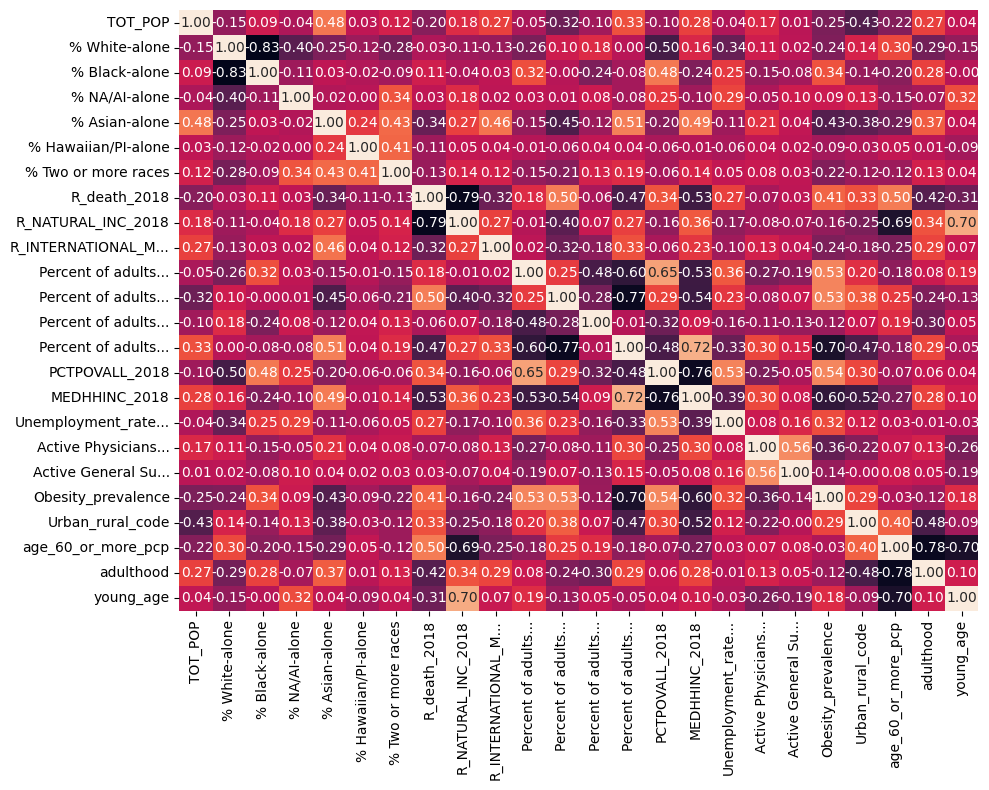

In [99]:
corr_y = df.corr(numeric_only=True)

short_labels = [
    col if len(col) <= 20 else col[:17] + "..."
    for col in corr_y.columns
]

plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_y, annot=True,
            fmt=".2f", cbar=False,
            xticklabels=short_labels,
            yticklabels=short_labels
)

plt.tight_layout()
plt.show()


## explicación sobre el analisis de datos.

> Recientemente aplicamos muchos pasos, notamos que con tantas variables graficar era increiblemente dificil y tomamos el camino de la correlacion. primero revisamos todas las variables que tenian una alta correlacion entre ellas. 80% nos parecia un umbral obvio y partimos desde alli. Pudimos borrar una gran cantidad de variables, luego las que quedaban las comparamos con el target, en este caso `Obesity_prevalence` para tomar una decision en cuanto que datos son los que realmente nos ayudaran a ejecutar el modelo. Finalmente unimos variables segun los rangos de edad, viendo que ligeramente influian las edades en los rangos de 10 años, decidimos unir a los jovenes, las adultos, y las personas mayores. asi tendremos menos variables para hacer un mejor EDA.
>
>
## Observaciones durante el analisis
>La obesidad se concentra en condados con peor situación socioeconómica: más pobreza, menores ingresos y menor nivel educativo. Por el contrario, los condados con más población universitaria y mayor renta muestran menores tasas de obesidad.  
>La obesidad también se asocia a peores condiciones laborales y de salud general del entorno: condados con más paro y mayor mortalidad presentan mayores niveles de obesidad.  
>Existen diferencias raciales claras en la distribución de la obesidad. Los condados con mayor proporción de población negra muestran más obesidad, mientras que aquellos con mayor proporción de población asiática presentan niveles menores. Estas diferencias probablemente reflejan desigualdades históricas de acceso a recursos, educación e ingresos, más que factores biológicos.
>La estructura por edad del condado parece tener un papel secundario en la obesidad. Se observan relaciones moderadas con la proporción de población más joven, pero en general la edad no explica tanto como educación, pobreza o ingresos.  
>La obesidad es algo mayor en condados más rurales y con menos recursos sanitarios por habitante. Aquellos condados con más médicos por 100.000 habitantes tienden a mostrar menores niveles de obesidad, aunque el efecto es más débil que el de las variables socioeconómicas.  



## Paso 7: Split

In [100]:
df.shape

(3140, 24)

In [101]:
X = df.drop("Obesity_prevalence", axis=1)
y = df["Obesity_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

## Paso 8: Scaling & Encoding

### Normalización 

In [102]:
num_variables = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
norm_scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[num_variables] = norm_scaler.fit_transform(X_train[num_variables])

# 3. Transformar X_test con el mismo scaler
X_test_scaled = X_test.copy()
X_test_scaled[num_variables] = norm_scaler.transform(X_test[num_variables])



### Guardando los scalers & encoders

In [103]:
with open('../models/obesity_scaler.pkl', 'wb') as file:
    pickle.dump(norm_scaler, file)

## Paso 9: Creamos y entrenamos el modelo.

In [104]:
def warn(*args, **kwargs):
    pass


warnings.warn = warn

In [105]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [106]:
y_pred = lr_model.predict(X_test)

f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)} Coeficiente de determinación: {r2_score(y_test, y_pred)}"

'Error cuadrático medio: 9.047402937630812 Coeficiente de determinación: 0.5482639374806383'

### Regularización Lasso

In [107]:
lasso_model = Lasso(alpha=0.09, max_iter=1000, random_state=18)
lasso_model.fit(X_train, y_train)  # entrenamiento

lasso_y_pred_test = lasso_model.predict(X_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(X_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.642458,1.735321,6.250418,7.325916,2.706643
Test set,0.603813,1.871605,6.665952,7.934860,2.816888
Difference,-0.038645,0.136284,0.415534,0.608944,0.110245


## Observaciones

>Gracias a Lasso podemos bajar nuestro calculo de un 54% un 64%. con esto concluimos nuestro proyecto.